In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
%matplotlib inline

# Read microbiome data and metadata

In [2]:
# meta data
df_meta = pd.read_csv("HMP/HMP_metadata.txt", sep="\t", index_col=0)
df_meta['host_visit_id'] = [str(x)+'_'+str(y) for x,y in zip(df_meta.host_subject_id, df_meta.visit_no)]

# taxonomy
df_tax = pd.read_csv('HMP/HMP_taxonomy.tsv', sep="\t").rename({'Feature ID':'ASV'}, axis=1)
df_tax = df_tax[df_tax.Taxon.str.contains('Bacteria')]
df_tax = df_tax[~(df_tax.Taxon.str.contains('Chloroplast') | df_tax.Taxon.str.contains('Mitochondria'))]
df_tax['LowestTaxonomy'] = [t.split(';')[-1].strip() for t in df_tax.Taxon]

# count
df_count = pd.read_csv('HMP/HMP_feature_table.txt', sep="\t", index_col=0)
df_count = df_count.loc[df_tax['ASV']].T
sample_ids_w_suff_reads = list(df_count.sum(axis=1)[df_count.sum(axis=1)>=1000].index)
df_count = df_count.loc[set(df_meta.index).intersection(set(sample_ids_w_suff_reads))]
df_count = df_count.loc[:, (df_count != 0).any(axis=0)]
df_relabun = df_count.div(df_count.sum(axis=1), axis=0)
df_meta = df_meta.loc[df_relabun.index]

/var/folders/zg/9bd_wdgn3qg8kl1z973r48mjxx5dnb/T/ipykernel_88310/596971803.py:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_count = df_count.loc[set(df_meta.index).intersection(set(sample_ids_w_suff_reads))]


# Run tSNE

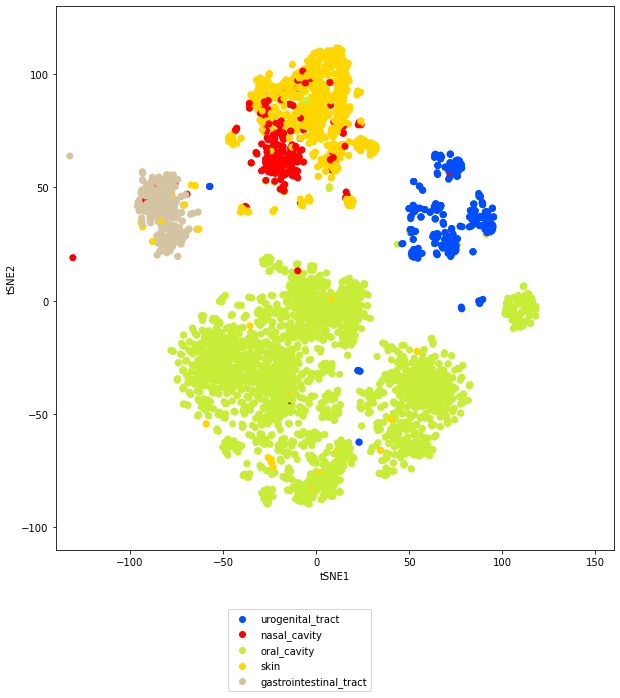

In [3]:
# uncomment the following code if you want to rerun tSNE
#tsne_data = TSNE(n_components=2, random_state=42, verbose=0, n_jobs=-1, n_iter=5000, metric='braycurtis').fit_transform(df_relabun.values)
#tsne_df = pd.DataFrame(data=np.vstack((tsne_data.T, df_meta.loc[df_relabun.index,'env'])).T, columns=('tSNE1', 'tSNE2', 'Bodysite'))
#tsne_df.tSNE1 = tsne_df.tSNE1.astype(float)
#tsne_df.tSNE2 = tsne_df.tSNE2.astype(float)
#tsne_df.to_csv('tsne_hmp.csv', index=False)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tsne_df = pd.read_csv('tsne_hmp.csv')
palette1 ={'oral_cavity':'#c7ed39',
           'urogenital_tract':'#004eff',
           'nasal_cavity':'#ff0000',
           'skin':'#ffd700',
           'gastrointestinal_tract':'#d5c4a1'}
_ = sns.scatterplot(x='tSNE1', y='tSNE2', hue='Bodysite', edgecolor='None', data=tsne_df, s=50, ax=ax, palette=palette1)
_ = ax.legend(bbox_to_anchor=(0.3, -0.1), loc='upper left', ncol=1)
_ = ax.set_xlim([-140,160])
_ = ax.set_ylim([-110,130])